In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [2]:
# Xtrue = np.arange(0.0, 1.0, 0.001)
Xtrue = [random.randint(1, 100) * 0.01 for x in range(1000)]

In [3]:
SLOPE = 2.0
INTERCEPT = -1.5

ytrue = []

for x in Xtrue:
    
    y = SLOPE*x + INTERCEPT + np.random.normal(0, 0.2)
    ytrue.append(y)

ypred = [SLOPE*x + INTERCEPT for x in Xtrue]

Text(0,0.5,'Y values')

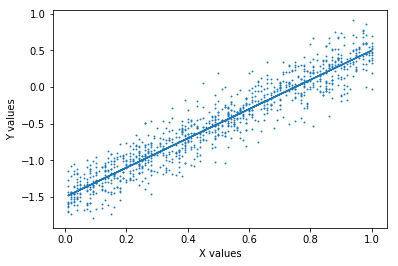

In [4]:
plt.scatter(Xtrue, ytrue, s=0.8)
plt.plot(Xtrue, ypred)
plt.xlabel('X values')
plt.ylabel('Y values')

In [5]:
def make_line(xdata, slope, intercept):
    
    #xdata is a list
    #slope is a single number
    #intercept is a single number
    
    ypred = []
    
    for x in xdata:
        
        y = slope * x + intercept
        
        ypred.append(y)
    
    return ypred #return a list

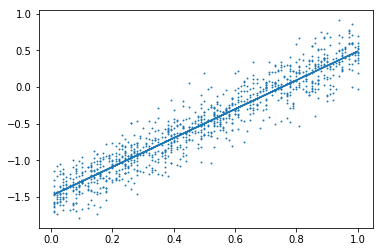

In [6]:
plt.scatter(Xtrue, ytrue, s=0.8)
plt.plot(Xtrue, make_line(Xtrue, 1.974, -1.485))

### We need a loss function!

- We, as humans, can tell visually whether or not a line is "good" or "bad".
- The computer, which obviously can't "see" the picture, needs some kind of measure / number to let it know how "good" or "bad" its guess is.

In [7]:
def mse(ytrue, ypred): 
    vals = []
    for i, j in list(zip(ytrue, ypred)):
    
        vals.append((i-j)**2)

    error = sum(vals)/len(ytrue)
    return error

In [8]:
a = [5.0, 4.0, 3.0]
b = [3.0, 2.0, 1.0]

In [9]:
'''So remember, the best fit of our line is going to be '''
crap_line = make_line(Xtrue, 2.001, -1.5001)
mse(ytrue, crap_line)

0.03926544296723709

lowest error: 0.0364

### What we did so far:

- found a way to make a line given any slope and intercept
- based on the resulting line, we can calculate the error between that line and the actual points
    - so this helps us determine how good or bad our line is (e.g. compared to a previous attempt)

### What do we need to do now?

- now that we have a way of determining the "goodness" or "badness" of a line given some initial guess at the slope and intercept, we need a way to figure out how to actually change the slope and intercept in such a way that our error gets lower!!

In [10]:
def calc_gradient(Xdata, ytrue, slope, intercept):

    dw = 0.0001
    ypred = make_line(Xdata, slope, intercept) #first guess!
    # a list of numbers

    '''tweak first parameter'''
    slope_change = slope + dw
    ypred_slope = make_line(Xdata, slope_change, intercept) #just tweaking slope!!!
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    intercept_change = intercept + dw
    ypred_intercept = make_line(Xdata, slope, intercept_change)
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [deriv_slope, deriv_intercept]

The function above basically gives us directionality: 
- Would the error go up or down if I increased slope ever so slightly?
- Would the error go up or down if I increased intercept ever so slightly?

### Now time for the algorithm!!

In [15]:
import time
import imageio

images = []
SLOPE_START = -8.0
INTERCEPT_START = 4.0
LR = 80 #arbitrary learning rate
MAX_ITER = 500

#We hope that this algorithm will eventually take us to the best possible parameters:
    # i.e. slope ~ 2.0 and intercept ~ -1.5


for i in range(MAX_ITER):
    
    time.sleep(0.02)
        
    """1. In each iteration of the loop, calculate the gradient of your loss function."""
    deriv_slope, deriv_intercept = calc_gradient(Xtrue, ytrue, SLOPE_START, INTERCEPT_START)


    """2. For each parameter, multiply the corresponding partial derivative by the
    learning rate, then negate it. Add the resulting product to
    the previous value of the parameter to get the updated parameter value."""
    
    SLOPE_NEW = deriv_slope * -LR + SLOPE_START
    INTERCEPT_NEW = deriv_intercept * -LR + INTERCEPT_START


    """3. At the end of each iteration, overwrite the values of each parameter
    with its modified value."""
    
    SLOPE_START = SLOPE_NEW
    INTERCEPT_START = INTERCEPT_NEW


    """4. If the gradient becomes smaller than some pre-determined threshold
    value, break out of the loop."""
    
    if i % 10 == 0:
        
#         plt.figure()
#         ypred = make_line(Xtrue, SLOPE_START, INTERCEPT_START)
#         plt.plot(Xtrue, ypred)
#         plt.title(f'Iteration Number: {i}, Error: {mse(ytrue, ypred)}')
#         plt.scatter(Xtrue, ytrue, s=0.8)
#         filename = f'iter_{i}.png'.format(i)
#         plt.savefig(filename)  
#         images.append(imageio.imread(filename))
    
        print(f"Iteration Number: {i}, SLOPE: {SLOPE_NEW:.3f}, INTERCEPT: {INTERCEPT_NEW:.3f}")
    

# imageio.mimsave('output.gif', images, fps=10)
# print('Printed GIF!!!')



Iteration Number: 0, SLOPE: 81.442, INTERCEPT: -89.414
Iteration Number: 10, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 20, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 30, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 40, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 50, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 60, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 70, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 80, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 90, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 100, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 110, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 120, SLOPE: 5002866312266.958, INTERCEPT: 9169672800834.928
Iteration Number: 